<html>
    <h1> GMM
        </h1>
        <p> <b> Min Khant Soe</b> </p>
        <p> ID: 122277 </p>
        <p> ^_^ </p>
    </html>

Modify the scratch code of gaussian mixture clustering in our lecture:
    
Modify so it performs early stopping when the log likelihood does not improve anymore. Note that if you log the normal distribution, you will get negative sign. Thus if you ignore the negative sign, it will become negative likelihood, and thus will get smaller and smaller.

Perform plotting every 5 iterations on the resulting clusters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import math

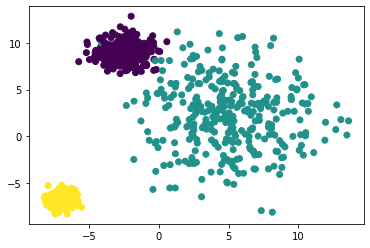

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 1000, cluster_std =  [1.0, 3.5,0.5], random_state = 42)
plt.scatter(X[:,0],X[:,1], c= y)

Iteration: 0
NLL: -23922.45791182255
NLL difference:  23922.45791182255


Iteration: 5
NLL: -52928.97927598259
NLL difference:  17292.09118188981


Iteration: 10
NLL: -139942.47932666118
NLL difference:  28408.42098056167


Iteration: 15
NLL: -415210.8807338803
NLL difference:  112.29142185702221


Final NLL:  -415285.9122599739
final difference:  2.909882144187577


Text(0.5, 1.0, 'Final Plot')

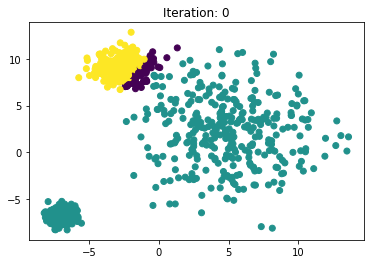

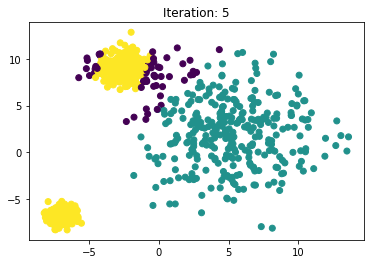

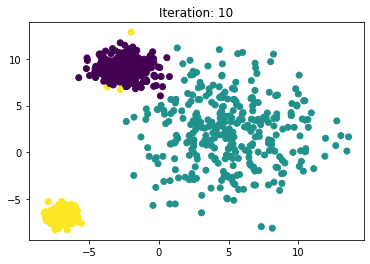

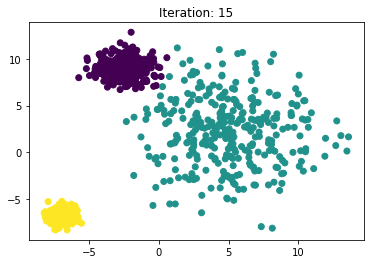

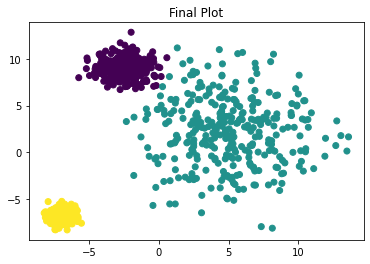

In [3]:
m,n = X.shape
K = 3
max_iter = 30

r = np.full(shape=(m,K), fill_value = 1/K)    #responsibliity
pi = np.full((K, ), fill_value  = 1/K)        #pi

np.random.seed(35)
randow_row = np.random.randint(0, m, K)                    #simply use 1/k for pi
mean = np.array([X[idx,:] for idx in randow_row]).T        #mean  >>  .T to make to shape (M, K)
cov = np.array([np.cov(X.T) for _ in range (K)])           #covariance

previous_NLL = 0  # NLL = Negative Log likelihood
threshold = 5     #for early stop

for iteration in range (max_iter):
    
    # E step
    for i in range(m):
        for k in range(K):
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, k], cov = cov[k])
            r[i,k] = pi[k] * xi_pdf  # p(y) * p(X|y)
    
        r[i] /= np.sum(r[i])                                 #Update r_ik of each sample
    
    NLL = 0
    for i in range(m):
        for k in range(K):
            NLL += math.log(pi[k]) + multivariate_normal.logpdf(X[i], mean=mean[:, k], cov=cov[k])     # Log Likelihood equation
            
    difference = math.fabs(NLL - previous_NLL)   # math.fabs to show float absolute value
    
    # to plot at every 5 iteration 
    if(iteration % 5 == 0):
        yhat = np.argmax(r, axis=1)
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=yhat)
        plt.title(f"Iteration: {iteration}")
        print(f"Iteration: {iteration}")
        print("NLL:", NLL)
        print("NLL difference: ", difference)
        print("\n")
    
    # Early Stopping
    if(difference < threshold):           #if difference become less than threshold, stop
        print("Final NLL: ", NLL)
        print("final difference: ", difference)
        break
    previous_NLL = NLL
    
    # M step
    NK = np.sum(r, axis=0)            # Find NK first for latter use
    assert NK.shape == (K, )
    
    pi = NK / m                       #Update PI
    assert pi.shape == (K, )
    
    mean = (X.T @ r)/NK               #update mean
    assert mean.shape == (n, K)
    
    cov = np.zeros((K, n,n))          
    
    for k in range(K): #column
        for i in range(m):   #row
            X_mean = (X[i]-mean[:,k]).reshape(-1,1)    #need to reshape
            cov[k] += r[i,k] * (X_mean @ X_mean.T)
        cov[k] /= NK[k]                                #update covariance
#     print(cov)

    assert cov.shape == (K, n, n)

    
    
yhat = np.argmax(r, axis = 1)       #Prediction
# print(yhat)


#Plot
#The last iteration plot must be same with this plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat)
plt.title("Final Plot")